# Deutsch's Algorithm

This algorithm was introduced by David Deutsch in 1985, and was the first algorithm that showed that a quantum algorithm can outperform a classical one.<br/>
How does Deutsch's algorithm outperform its classical counterpart?
<img src="./fig/deutsch.jpg" width="200"> 
<div align="center">David Deutsch (Courtesy of Wikimedia Commons)</div>

Yuri Kobayashi

# Deutsch's Problem: Is 𝑓(𝑥) constant?

You are given an unknown boolean function $f(x)$ and need to find out its properties. A classical way requires several queries to the function to find out the answer. However, if there is an algorithm that would give you an answer with far less number of queries, you are speeding up the calculation time and achieving better performance. The number of queries that are required to determine what the function does is called **query complexity**.

Deutsch's quantum algorithm allows you to solve a black box problem with better query complexity than any classical algorithm. Let's take a closer look.

Suppose you were given a boolean function as below. It is a single bit function that takes either 0 or 1 as an input, and gives you 0 or 1 as an output.

<center>$f(x| x \in \{0,1\})$ → $\{0,1\}$

Let's take a moment and think about the possible behavior of this function. For a single qubit boolean function that allows only 0 or 1 as an input and output, the only possible results can be the following four, which can be grouped as being either constant or balanced.

|$x$||$f_{1}$|$f_{2}$|$f_{3}$|$f_{4}$|
|--||--|--|--|--|
|0||0|0|1|1|
|1||0|1|0|1|

(1) **Constant**<br/> 
The output of the function will be independent of the inputs.<br/> 
<center>𝑓(0)=𝑓(1)=0 or 𝑓(0)=𝑓(1)=1

(2) **Balanced**<br/> 
The output of the function will be dependent on the inputs.<br/> 
<center>𝑓(0)=0, 𝑓(1)=1  or 𝑓(0)=1, 𝑓(1)=0

If you were given a blackbox to evaluate the function, classicaly you will have to make two evaluations of the function to determine whether it is constant or not. But David Deutch came up with an algorithm which requires only a single evaluation to figure this out.

# The quantum oracle

How can we evaluate the function using a quantum computer? Here we need to encode a function as a unitary transform called an **oracle**.

In this case, the oracle takes two qubits (|𝑥⟩ and |𝑦⟩)of input and produces two qubits of output as shown below.

<img src="./fig/uf_1.png" width="200">

$U_{f}$ maps the input |𝑥⟩|𝑦⟩ state to |𝑥⟩|𝑓(𝑥) ⨁ 𝑦⟩, where ⨁ is addition modulo 2, which is essentially a CNOT.  <br/> Let us encode the possible inputs |𝑥⟩|𝑦⟩=|0⟩|0⟩, |0⟩|1⟩, |1⟩|0⟩,| 1⟩|1⟩ into this oracle and see how it computes. <br/><br/> 

<center>
|0⟩|0⟩  ↦ $U_{f}$  ↦  |0⟩|𝑓(0) ⨁ 0⟩<br/><br/>
|0⟩|1⟩  ↦ $U_{f}$  ↦  |0⟩|𝑓(0) ⨁ 1⟩<br/><br/>
|1⟩|0⟩  ↦ $U_{f}$  ↦  |1⟩|𝑓(1) ⨁ 0⟩<br/><br/>
|1⟩|1⟩  ↦ $U_{f}$  ↦  |1⟩|𝑓(1) ⨁ 1⟩<br/><br/>  

# The alrogithm

To use a quantum computer to solve Deutsch's problem, we need to provide the inputs in superposition. Then, we apply the unitary transformation $U_{f}$ to determine whether the function is constant or not. 
Now, let's go through the steps of the algorithm:
1. Prepare two quantum registers. Initialize to |0⟩|1⟩. 
(i.e. The first register is initialized to |0⟩ and the second register to |1⟩) <br/>
2. Apply a Hadamard to all qubits to create superpositions <br/>
<center>
H|0⟩ ↦ $\frac{1}{\sqrt 2}$(|0⟩ + |1⟩) = |+⟩　 <br/><br/>
H|1⟩ ↦ $\frac{1}{\sqrt 2}$(|0⟩ - |1⟩) = |-⟩　 <br/><br/>

3. Apply unitary transformation $U_{f}$ ↦ |𝑥⟩|𝑓(𝑥) ⨁ 𝑦⟩ to the qubits in superposition <br/> 
<br/> 
<center>
$U_{f}$(|+⟩|-⟩) = $U_{f}\frac{1}{2}$(|0⟩ + |1⟩)(|0⟩ - |1⟩)<br/><br/>
= $\frac{1}{2}$(|0⟩|0⟩ - |0⟩|1⟩ + |1⟩|0⟩ - |1⟩|1⟩) <br/><br/>
= $\frac{1}{2}$(|0⟩(|f(0) ⊕ 0⟩-|f(0) ⊕ 1⟩)+|1⟩(|f(1) ⊕ 0⟩-|f(1) ⊕ 1⟩)) <br/><br/>
= $\frac{1}{2}\sum_{x=0}^{1}$|𝑥⟩(|0 ⊕ f(x)⟩-|1 ⊕ f(x)⟩)<br/><br/>

When 𝑓(𝑥)=0: <br/>
<center>
$\frac{1}{\sqrt 2}$(|0 ⊕ f(x)⟩-|1 ⊕ f(x)⟩) = $\frac{1}{\sqrt 2}$(|0⟩ -| 1⟩) = |-⟩ <br/>

When 𝑓(𝑥)=1: <br/>
<center>
$\frac{1}{\sqrt 2}$(|0 ⊕ f(x)⟩-|1 ⊕ f(x)⟩) = $\frac{1}{\sqrt 2}$(|1⟩ - |0⟩) = -|-⟩ <br/>

Therefore:<br/>
<center>
$U_{f}(\frac{1}{\sqrt 2}\sum_{x=0}^{1}$|x⟩|-⟩) = $\frac{1}{\sqrt 2}\sum_{x=0}^{1}(-1)^{f(x)}$|x⟩|-⟩

For 𝑓(𝑥) constant, $(-1)^{f(x)}$ is a global phase that cannot be observed so the state is simply |+⟩|-⟩.
For 𝑓(𝑥) not constant, the term $(-1)^{f(x)}$ negates exactly one of the terms in the superposition thus, up to the global phase, the state is |-⟩|-⟩.
If we apply the Hadamard transformation $H$ to the first qubit and then measure it, we obtain |0⟩ for a constant and |1⟩ for a balanced function with certainty.
Thus, with a single query to $U_{f}$ we can determine whether 𝑓(𝑥) is constant or not.

Let us verify this buy running this algorithm on a quantum simulator. 

# Building the circuit

In [2]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [5]:
#preparation of the Deutsch algorithm
circuitName = "Deutsch"
qr = QuantumRegister(2)
cr = ClassicalRegister(1)
dCircuit = QuantumCircuit(qr, cr)
def deutsch_algorithm(dCircuit, qr):
    """Apply gates to construct the circuit"""
# Flip the second register and apply the Hadamard gate.
    dCircuit.x(1)
    dCircuit.h(qr)
# Apply barrier to mark the beginning of the oracle
    dCircuit.barrier()
    dCircuit.i(qr[1])
# Apply barrier to mark the end of the oracle
    dCircuit.barrier()
# Apply Hadamard gates after querying the oracle
    dCircuit.h(qr)

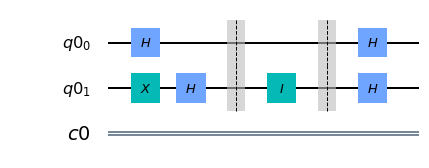

In [4]:
deutsch_algorithm(dCircuit, qr)
dCircuit.draw(output='mpl')

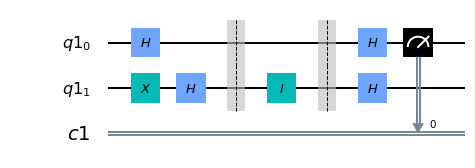

In [7]:
# Measurement on first register
dCircuit.measure(qr[0], cr[0])
dCircuit.draw(output="mpl")

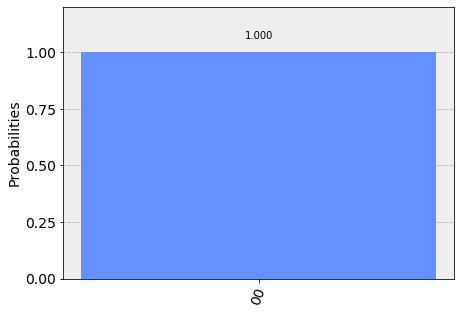

In [82]:
# Plot histogram of execution results
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(dCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

The oracle returns 0 which means the function is constant. Here we were able to detemine if the function is constant or not in one query.

# Deutsch-Josza Algorithm

Deutsch-Josza algorithm generalizes Deutsch's algorithm into a multiple qubit problem.
We are given a hidden Boolean function $f$, which takes as input a string of bits, and returns either $0$ or $1$, that is 
<center>$f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ , where } x_n \textrm{ is } 0 \textrm{ or } 1$.